In [15]:
from skimage import io
import cv2
from matplotlib.pyplot import imshow, show
import numpy as np

Leitura da imagem pbm

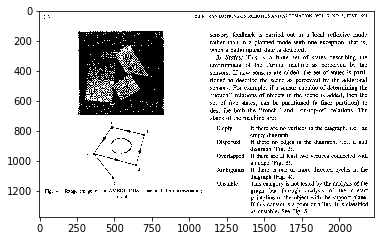

In [14]:
img = cv2.imread('inputs/bitmap.pbm', 0)
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imshow(img, cmap='gray')
show()

### Passo 1:
    Dilatação da imagem original com um elemento estruturante de 1 pixel de altura e 100 pixels de largura.

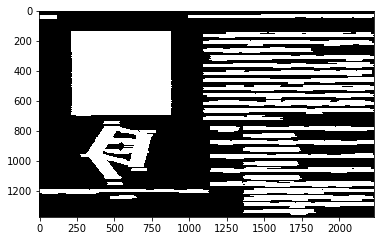

In [28]:
img_1 = img.copy()
kernel = np.ones((1,100))
img_dlt_1 = cv2.dilate(-img_1,kernel,iterations = 1)
imshow(img_dlt_1,cmap='gray')
show()

### Passo 2:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (1).

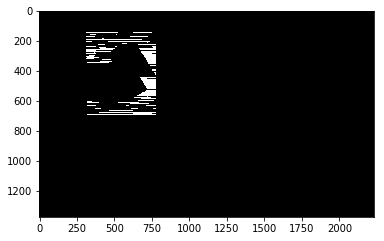

In [30]:
img_2 = img.copy()
kernel = np.ones((1,100))
img_ers_2 = cv2.erode(-img_2,kernel,iterations = 1)
imshow(img_ers_2,cmap='gray')
show()

### Passo 3:
    Dilatação da imagem original com um elemento estruturante de 200 pixels de altura e 1 pixel de largura.

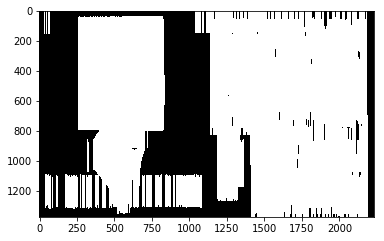

In [31]:
img_3 = img.copy()
kernel = np.ones((200,1))
img_dlt_3 = cv2.dilate(-img_3,kernel,iterations = 1)
imshow(img_dlt_3,cmap='gray')
show()

### Passo 4:
    Erosão da imagem resultante com o mesmo elemento estruturante do passo (3).

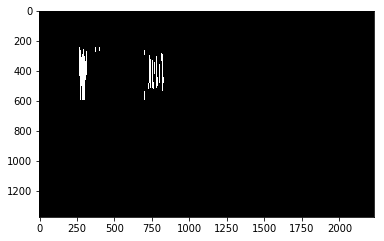

In [34]:
img_4 = img.copy()
kernel = np.ones((200,1))
img_ers_4 = cv2.erode(-img_4,kernel,iterations = 1)
imshow(img_ers_4,cmap='gray')
show()